In [1]:
# !conda install -c bioconda seqkit
# !pip3 install biopython
# This 2.0 version of the telo boundary script will use a slightly more advanced algorithm to identify 
# the telomere boundary. The algorithm will in effect look for a discontinuity in the telomere pattern, 
# marking the point where the sequence changes from telomere to non-telomere as the boundary. 

from Bio import SeqIO
from Bio.Seq import Seq
import numpy as np
import re
import matplotlib.pyplot as plt
import statistics
import sys

sys.path.insert(0, '../TeloBP')
# from TeloBP import *
from TeloBP import *
import constants as c

In [2]:
import threading
import time

def testFunction(output, sample):
    for i in range(sample-10, sample):
        output.append(i)
        # time.sleep(1)

sharedOut=[]

t1 = threading.Thread(target=testFunction, args=(sharedOut, 10,))
t2 = threading.Thread(target=testFunction, args=(sharedOut, 30,))

t1.start()
t2.start()

t1.join()
t2.join()
print("output: "+str(sharedOut))

output: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [3]:


def bruteForceTeloBPArgs(offsetScoresByValuesIn, windowMin, windowMax):
    for teloWindowValue in range(windowMin, windowMax, 6):
        for nucleotideGraphSize in range(30, 600, 12):
            for windowStepValue in range(6,13,3):
                bed_data = []
                currentOffsetScores = []

                filename = "Data/GCA_009914755.4_T2T-CHM13v2.0_genomic.500kb.ends.fna"
                for record in SeqIO.parse(filename, "fasta"):
                    chrName = record.id
                    # print(chrName)

                    # if chrName != "chr18q":
                    #     continue
                    if "p" in chrName:
                        distanceFromStart = getTeloBoundary(record.seq[:9000], isGStrand=False, targetPatternIndex=4, teloWindow=teloWindowValue,nucleotideGraphAreaWindowSize=nucleotideGraphSize, windowStep=windowStepValue,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=False)
                        # print("p end: " + str(distanceFromStart))
                        pEndIndex = distanceFromStart
                        bed_data.append([chrName, pEndIndex-6, pEndIndex, chrName])
                        offset = testTeloLength(chrName, distanceFromStart, c.manualLabelsCHM13)
                        currentOffsetScores.append(abs(offset))
                    else:
                        distanceFromEnd = getTeloBoundary(record.seq[-9000:],isGStrand = True, targetPatternIndex=4, teloWindow=teloWindowValue,nucleotideGraphAreaWindowSize=nucleotideGraphSize, windowStep=windowStepValue,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=False)
                        # print("q end: " + str(distanceFromEnd))
                        qEndIndex = len(record.seq)-distanceFromEnd
                        bed_data.append([chrName, qEndIndex, qEndIndex+6, chrName])
                        offset = testTeloLength(chrName, distanceFromEnd, c.manualLabelsCHM13)
                        currentOffsetScores.append(abs(offset))
                offsetScoresByValuesIn.append([teloWindowValue, nucleotideGraphSize, windowStepValue, sum(currentOffsetScores), statistics.mean(currentOffsetScores), statistics.median(currentOffsetScores)])
# print(offsetScoresByValues)

    # break
# write_bed_file("./teloBoundaryOutput/TeloBP%2.0Values.bed", bed_data)

In [4]:
offsetScoresByValues = []

t1 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 30,42,))
t2 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 42,60,))
t3 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 60,72,))
t4 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 72,90,))
t5 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 90,102,))
t6 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 102,120,))
t7 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 120,132,))
t8 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 132,150,))
t9 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 150,162,))
t10 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 162,180,))
t11 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 180,192,))
t12 = threading.Thread(target=bruteForceTeloBPArgs, args=(offsetScoresByValues, 192,210,))

t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()
t7.start()
t8.start()
t9.start()
t10.start()
t11.start()
t12.start()

t1.join()
t2.join()
t3.join()
t4.join()
t5.join()
t6.join()
t7.join()
t8.join()
t9.join()
t10.join()
t11.join()
t12.join()
print(offsetScoresByValues)

[[30, 30, 6, 2545, 53.020833333333336, 4.0], [42, 30, 6, 3017, 62.854166666666664, 4.5], [72, 30, 6, 2453, 51.104166666666664, 7.5], [60, 30, 6, 2685, 55.9375, 6.5], [102, 30, 6, 703, 14.645833333333334, 8.5], [120, 30, 6, 425, 8.854166666666666, 3.0], [132, 30, 6, 779, 16.229166666666668, 7.0], [90, 30, 6, 639, 13.3125, 13.0], [162, 30, 6, 613, 12.770833333333334, 7.0], [192, 30, 6, 737, 15.354166666666666, 3.5], [180, 30, 6, 599, 12.479166666666666, 3.0], [150, 30, 6, 699, 14.5625, 8.5], [30, 30, 9, 2703, 56.3125, 4.0], [42, 30, 9, 2585, 53.854166666666664, 5.0], [120, 30, 9, 459, 9.5625, 4.0], [60, 30, 9, 3040, 63.333333333333336, 10.5], [72, 30, 9, 2722, 56.708333333333336, 8.5], [132, 30, 9, 872, 18.166666666666668, 13.5], [90, 30, 9, 712, 14.833333333333334, 13.0], [102, 30, 9, 1008, 21, 10.5], [162, 30, 9, 588, 12.25, 5.0], [180, 30, 9, 468, 9.75, 4.0], [192, 30, 9, 461, 9.604166666666666, 4.0], [150, 30, 9, 664, 13.833333333333334, 8.0], [30, 30, 12, 2991, 62.3125, 6.0], [42, 3

In [5]:
# Save the offsetScoresByValues to a file output
with open("./output/offsetScoresByValuesCorrectedAreaDiffIndex.txt", "w") as f:
    for item in offsetScoresByValues:
        f.write("%s\n" % item)

In [7]:
# print out the lowest offset scores for sum, mean, and median
sumSorted = sorted(offsetScoresByValues, key=lambda x: x[3])
meanSorted = sorted(offsetScoresByValues, key=lambda x: x[4])
medianSorted = sorted(offsetScoresByValues, key=lambda x: x[5])
print("sumSorted: "+str(sumSorted[0]))
print("meanSorted: "+str(meanSorted[0]))
print("medianSorted: "+str(medianSorted[0]))

sumSorted: [30, 114, 6, 413, 8.604166666666666, 4.5]
meanSorted: [30, 114, 6, 413, 8.604166666666666, 4.5]
medianSorted: [120, 30, 6, 425, 8.854166666666666, 3.0]


In [12]:
# print out the top 50 lowest offset scores for sum
print("sumSorted top 5o0:")
for i in range(0,500):
    print(str(medianSorted[i]))


sumSorted top 5o0:
[120, 30, 6, 425, 8.854166666666666, 3.0]
[180, 30, 6, 599, 12.479166666666666, 3.0]
[186, 30, 6, 551, 11.479166666666666, 3.0]
[192, 30, 6, 737, 15.354166666666666, 3.5]
[30, 186, 6, 749, 15.604166666666666, 3.5]
[30, 198, 6, 793, 16.520833333333332, 3.5]
[30, 210, 6, 631, 13.145833333333334, 3.5]
[198, 30, 6, 721, 15.020833333333334, 3.5]
[204, 30, 6, 695, 14.479166666666666, 3.5]
[30, 30, 6, 2545, 53.020833333333336, 4.0]
[30, 30, 9, 2703, 56.3125, 4.0]
[120, 30, 9, 459, 9.5625, 4.0]
[180, 30, 9, 468, 9.75, 4.0]
[192, 30, 9, 461, 9.604166666666666, 4.0]
[30, 42, 9, 2540, 52.916666666666664, 4.0]
[192, 42, 6, 869, 18.104166666666668, 4.0]
[180, 42, 6, 845, 17.604166666666668, 4.0]
[192, 42, 9, 650, 13.541666666666666, 4.0]
[30, 174, 6, 757, 15.770833333333334, 4.0]
[42, 174, 6, 643, 13.395833333333334, 4.0]
[42, 186, 6, 819, 17.0625, 4.0]
[30, 198, 9, 601, 12.520833333333334, 4.0]
[60, 174, 6, 813, 16.9375, 4.0]
[42, 198, 6, 763, 15.895833333333334, 4.0]
[30, 210, 

In [15]:
#filter for scores for windows greater than 60, nucleotideawindows greater than 100
filteredOffsetScoresByValues = []
for item in offsetScoresByValues:
    if item[0] >= 60 and item[1] >= 100:
        filteredOffsetScoresByValues.append(item)


# sort by lowest mean
filteredOffsetScoresByValues = sorted(filteredOffsetScoresByValues, key=lambda x: x[4])


# print top 50 lowest offset scores for sum
print("filteredOffsetScoresByValues top 50:")
for i in range(0,50):
    print(str(filteredOffsetScoresByValues[i]))

filteredOffsetScoresByValues top 50:
[60, 522, 9, 588, 12.25, 8.0]
[60, 534, 9, 591, 12.3125, 7.5]
[60, 546, 9, 600, 12.5, 8.5]
[60, 522, 6, 647, 13.479166666666666, 10.0]
[66, 522, 9, 657, 13.6875, 8.0]
[60, 534, 6, 663, 13.8125, 9.0]
[66, 522, 6, 663, 13.8125, 9.5]
[60, 114, 6, 725, 15.104166666666666, 9.0]
[60, 126, 6, 725, 15.104166666666666, 9.0]
[60, 546, 6, 747, 15.5625, 10.0]
[66, 150, 6, 751, 15.645833333333334, 8.0]
[66, 162, 6, 757, 15.770833333333334, 7.0]
[66, 534, 9, 777, 16.1875, 9.0]
[60, 102, 6, 781, 16.270833333333332, 8.5]
[78, 102, 6, 789, 16.4375, 13.0]
[72, 114, 6, 797, 16.604166666666668, 10.0]
[66, 114, 6, 803, 16.729166666666668, 10.0]
[60, 306, 6, 807, 16.8125, 15.0]
[60, 174, 6, 813, 16.9375, 4.0]
[66, 306, 6, 813, 16.9375, 15.5]
[66, 558, 6, 819, 17.0625, 15.0]
[60, 318, 6, 821, 17.104166666666668, 16.5]
[66, 126, 6, 825, 17.1875, 9.0]
[78, 534, 6, 831, 17.3125, 15.0]
[60, 150, 6, 833, 17.354166666666668, 9.0]
[72, 558, 6, 833, 17.354166666666668, 16.0]
[60,

In [10]:
# find the list of values with the specified teloWindow, nucleotideGraphSize, and windowStep
def findValues(teloWindow, nucleotideGraphSize, windowStep):
    for item in offsetScoresByValues:
        if item[0] == teloWindow and item[1] == nucleotideGraphSize and item[2] == windowStep:
            return item
    return None

print(findValues(102, 450, 6))

[102, 450, 6, 1493, 31.104166666666668, 23.0]


chr01q


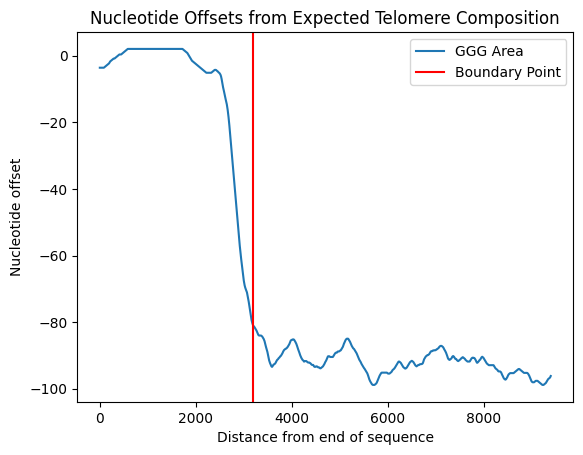

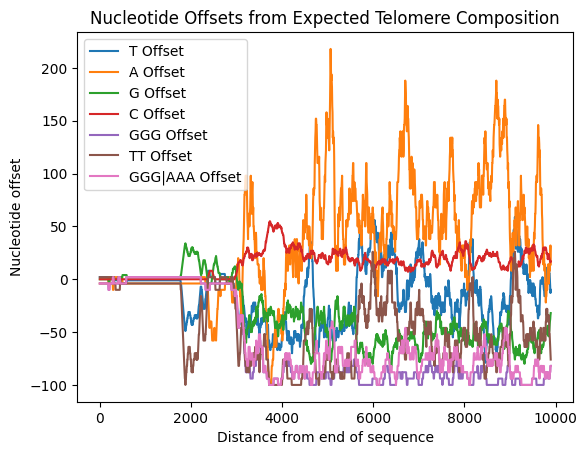

q end: 3192
offset: -18
chr02q


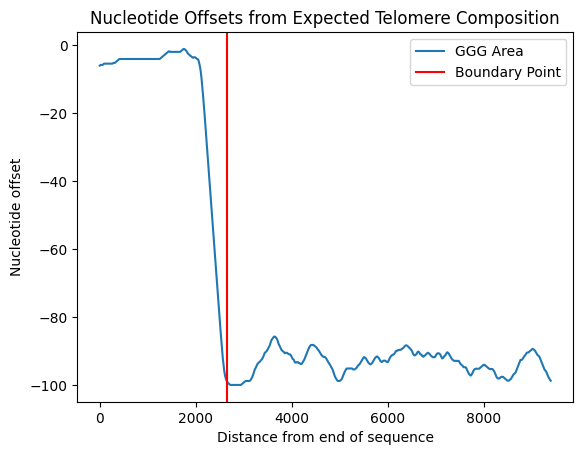

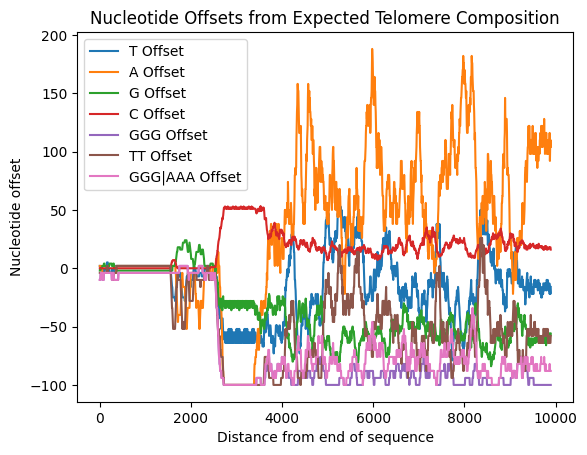

q end: 2640
offset: 18
chr03q


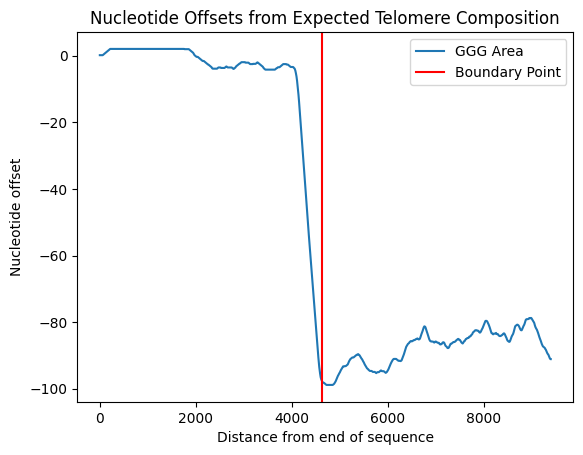

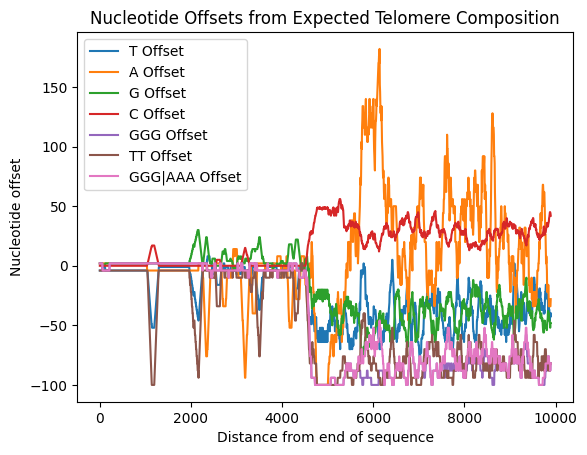

q end: 4638
offset: 23
chr04q


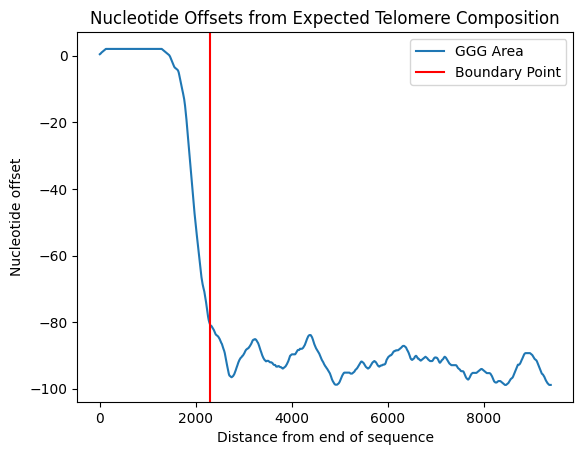

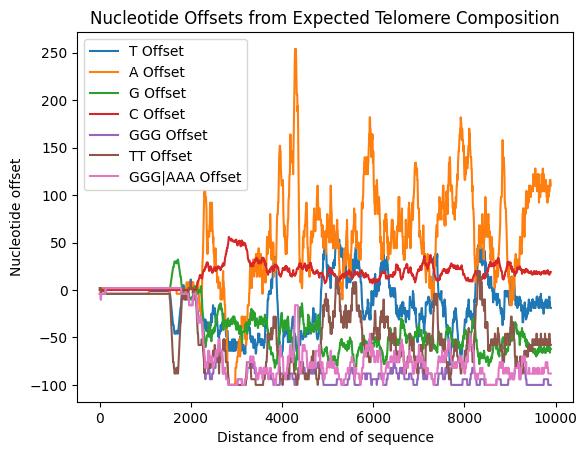

q end: 2298
offset: -23
chr05q


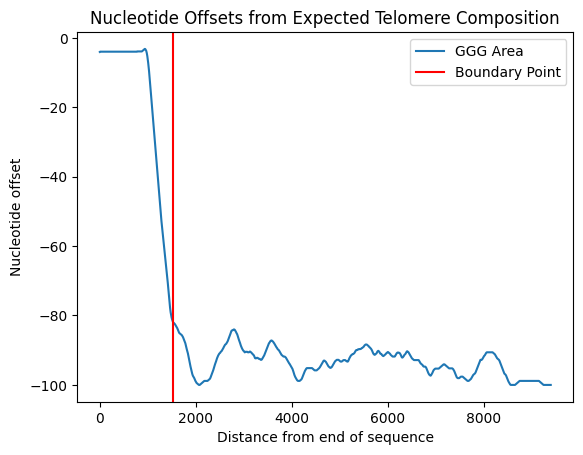

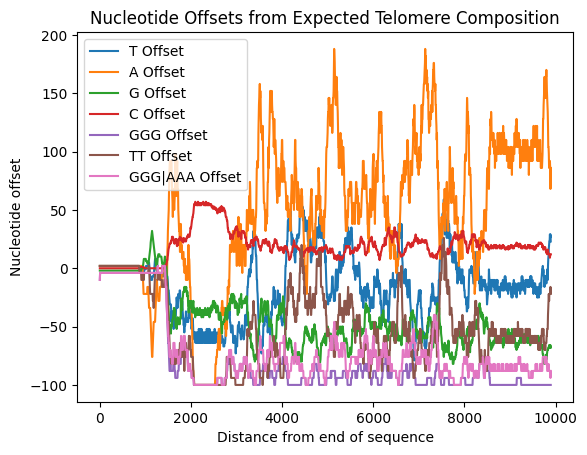

q end: 1524
offset: -6
chr06q


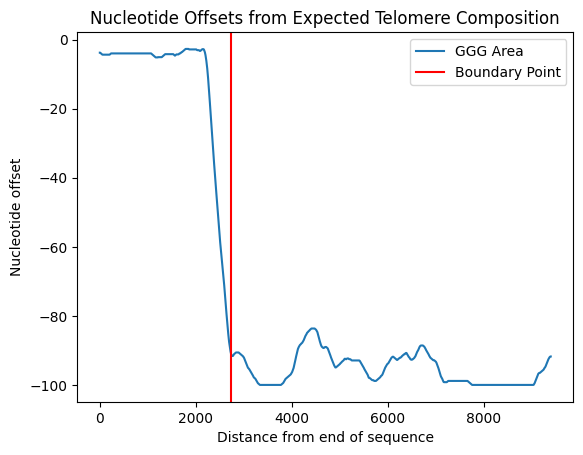

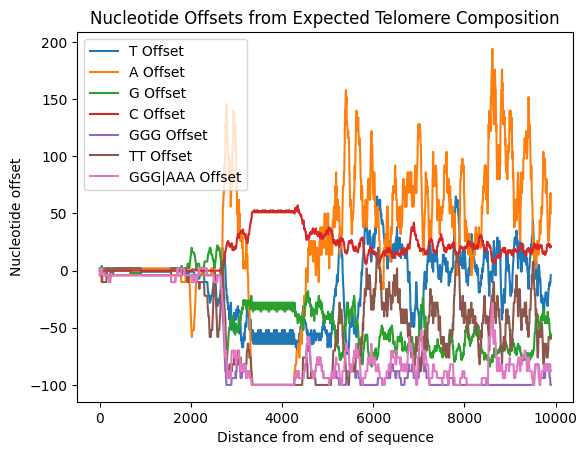

q end: 2742
offset: -36
chr07q


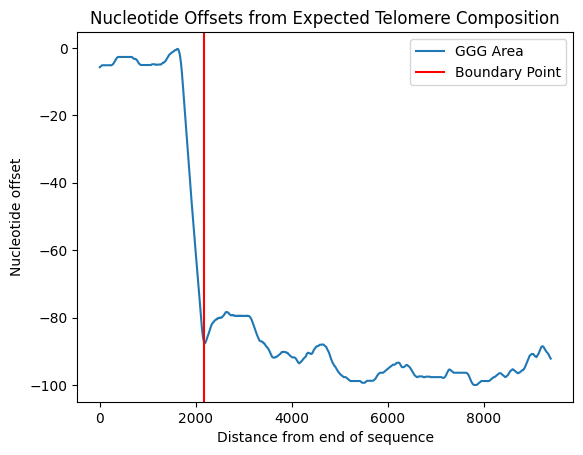

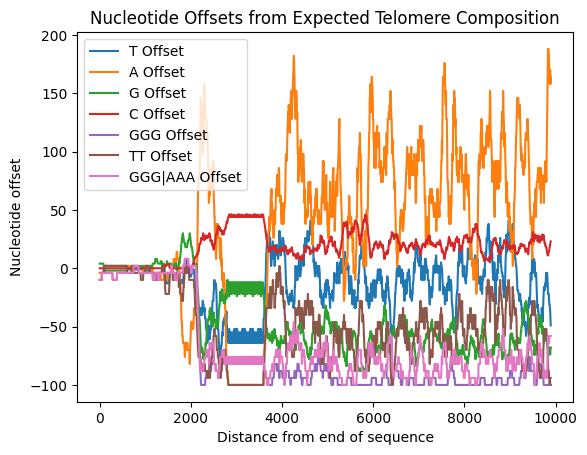

q end: 2178
offset: -44
chr08q


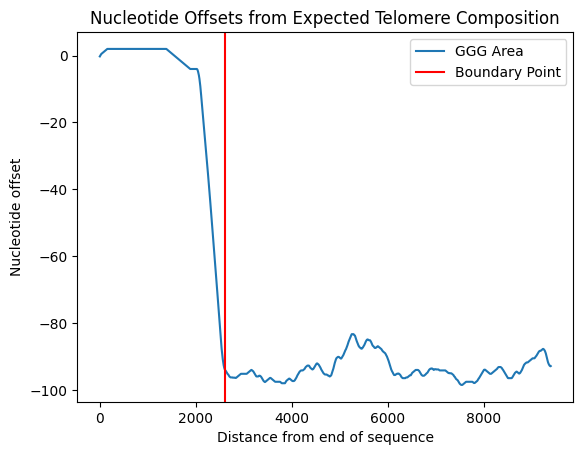

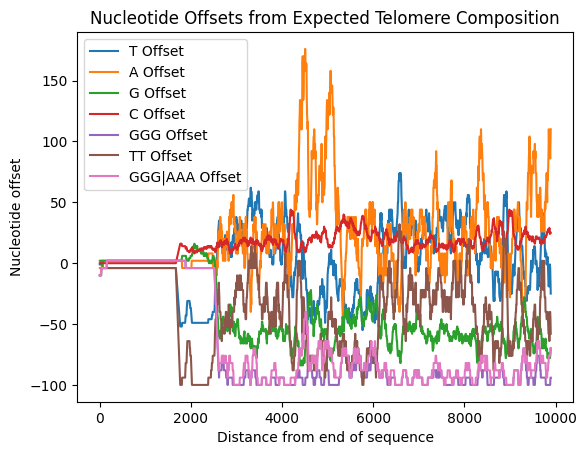

q end: 2604
offset: -17
chr09q


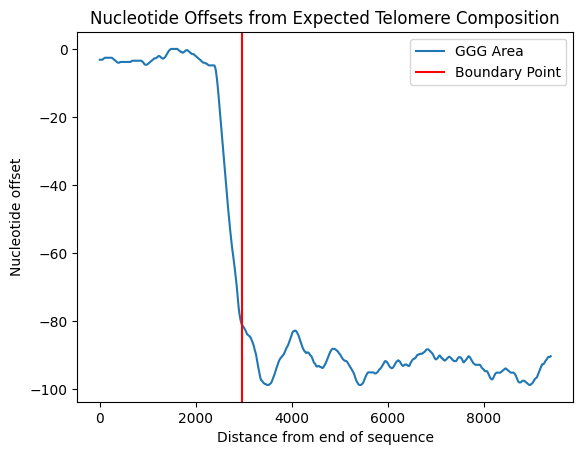

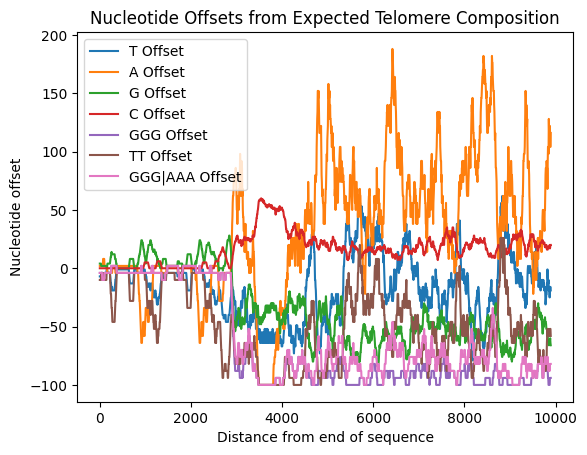

q end: 2958
offset: -19
chr10q


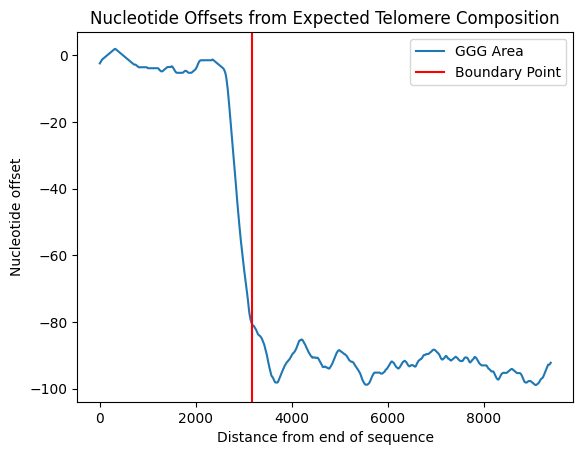

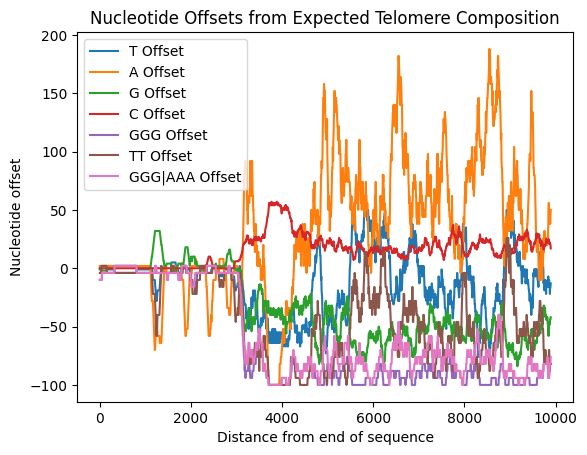

q end: 3174
offset: -29
chr11q


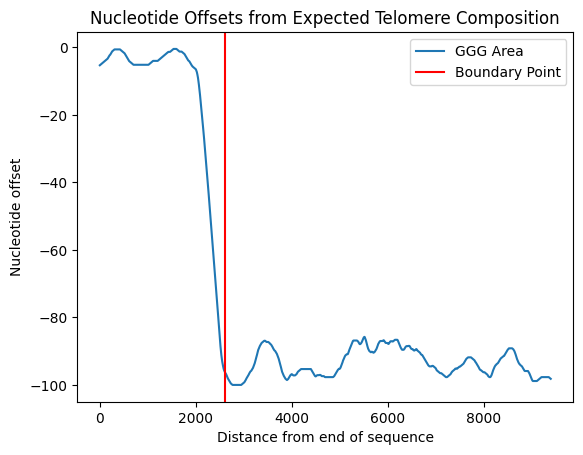

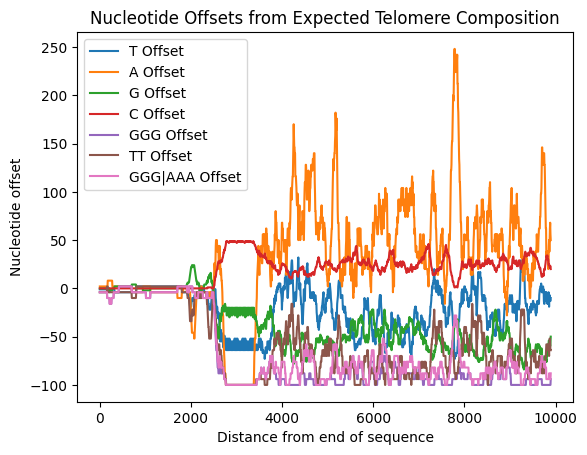

q end: 2604
offset: 15
chr12q


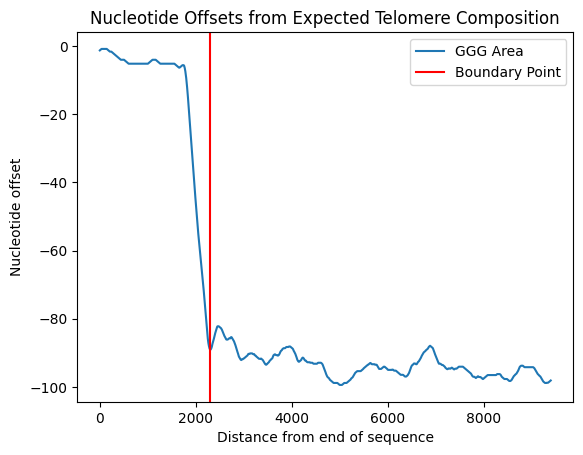

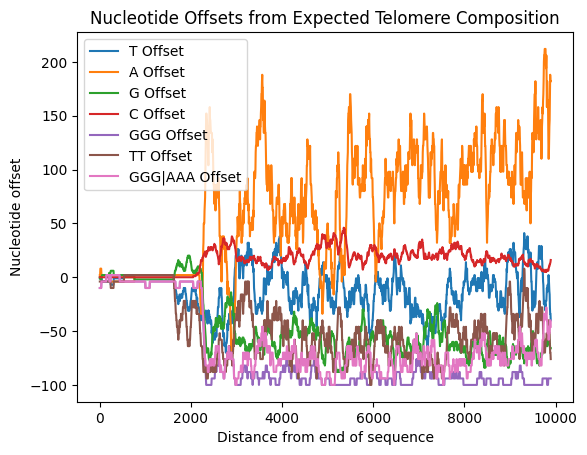

q end: 2292
offset: -47
chr13q


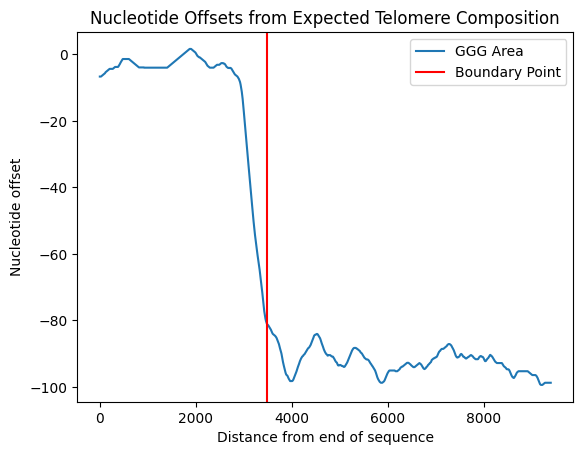

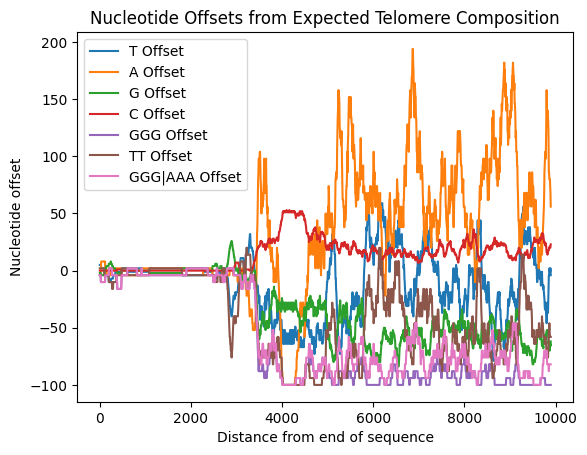

q end: 3480
offset: -26
chr14q


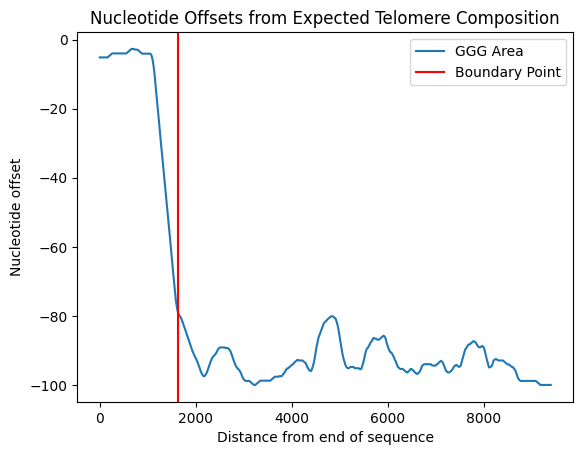

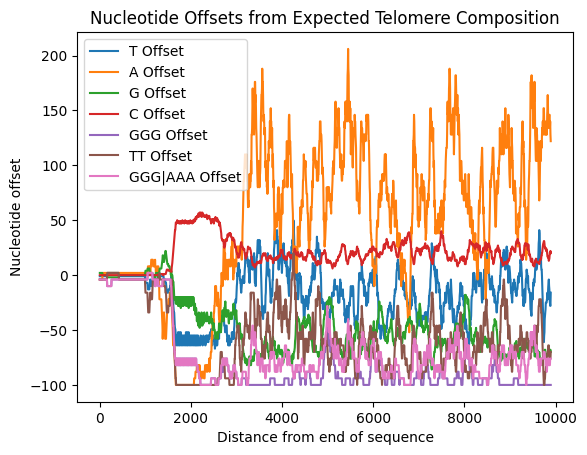

q end: 1638
offset: -14
chr15q


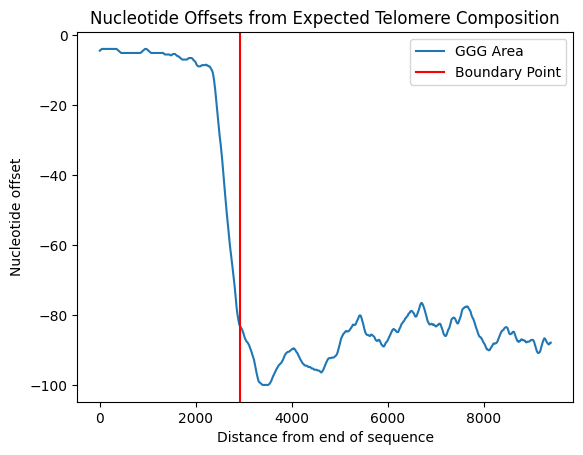

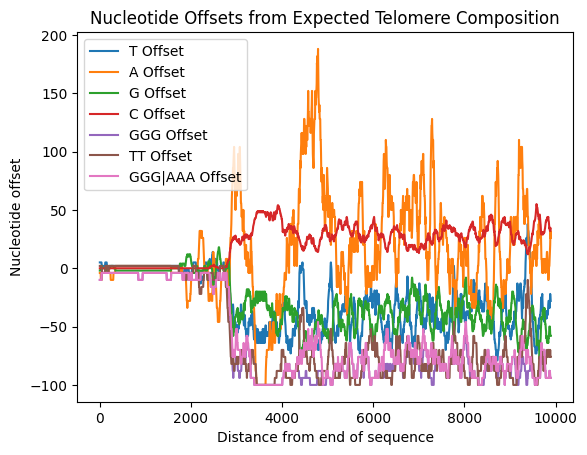

q end: 2916
offset: -13
chr16q


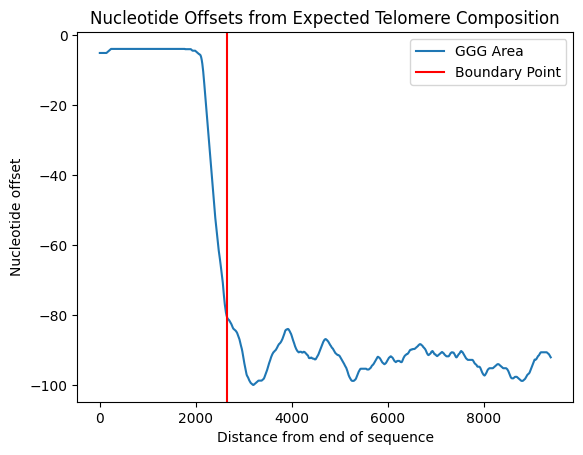

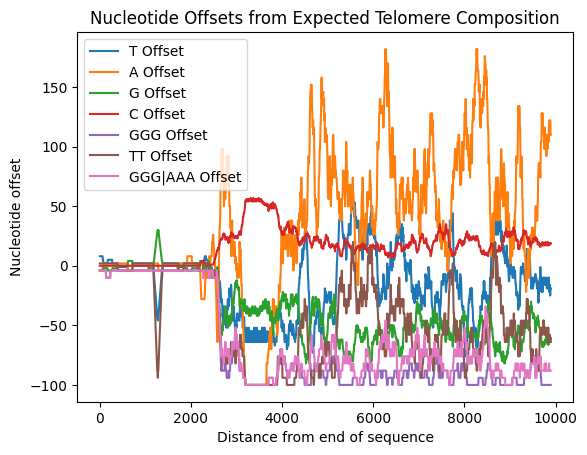

q end: 2658
offset: -25
chr17q


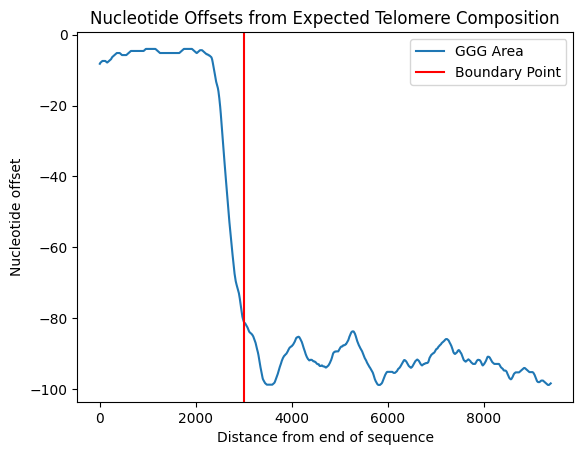

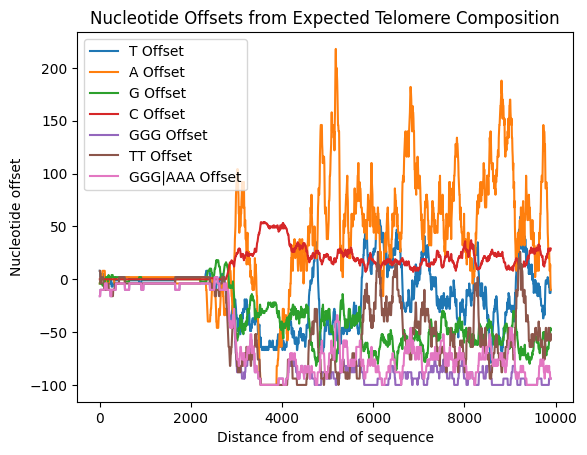

q end: 3000
offset: -21
chr18q


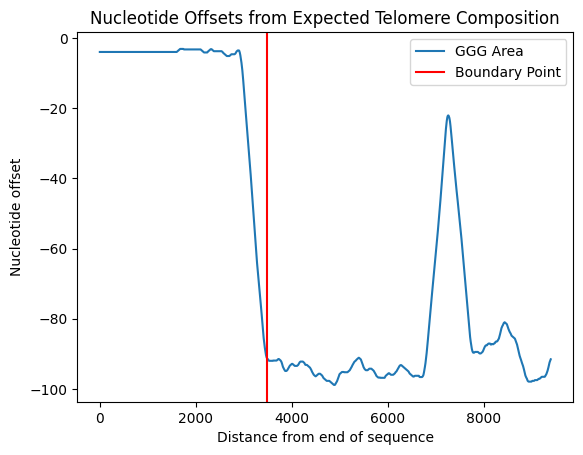

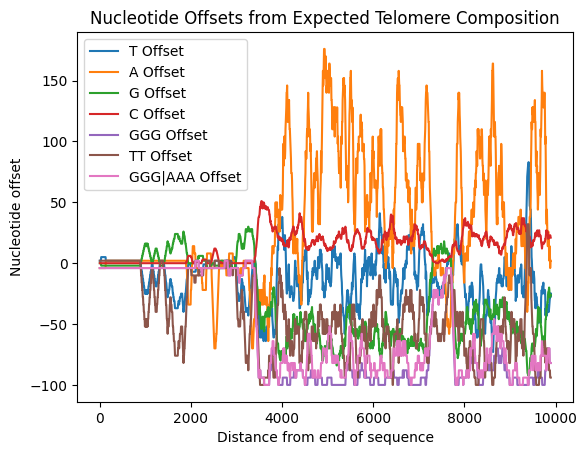

q end: 3480
offset: -9
chr19q


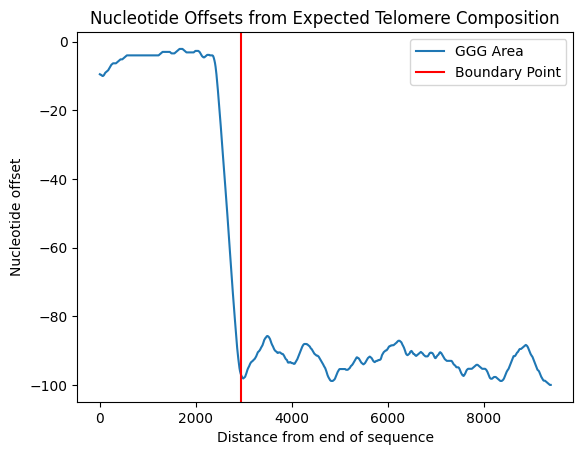

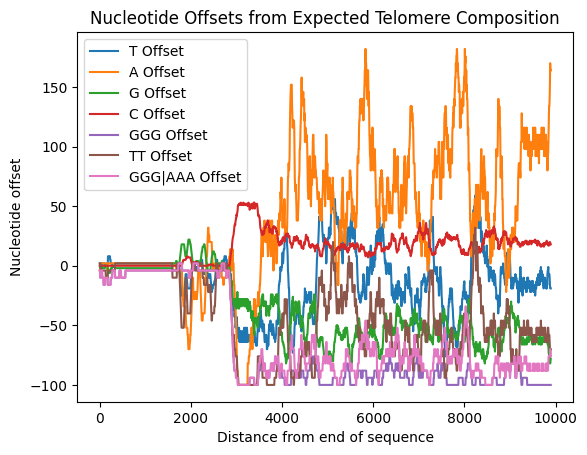

q end: 2952
offset: 12
chr20q


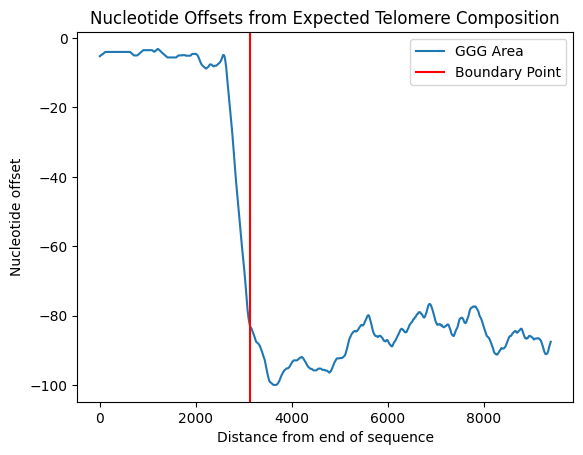

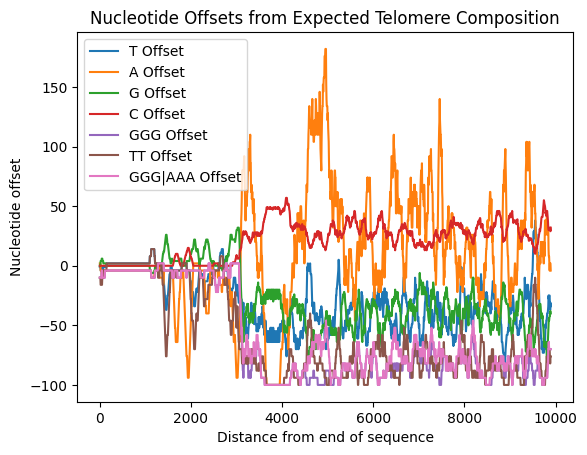

q end: 3138
offset: -15
chr21q


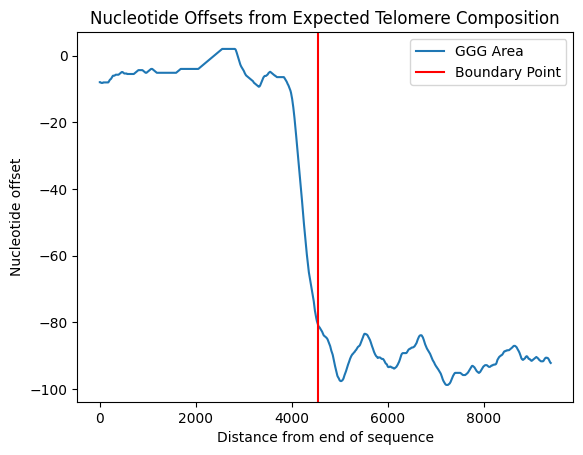

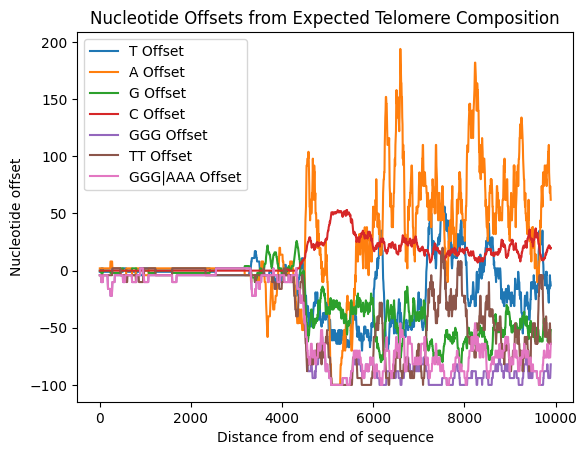

q end: 4554
offset: -19
chr22q


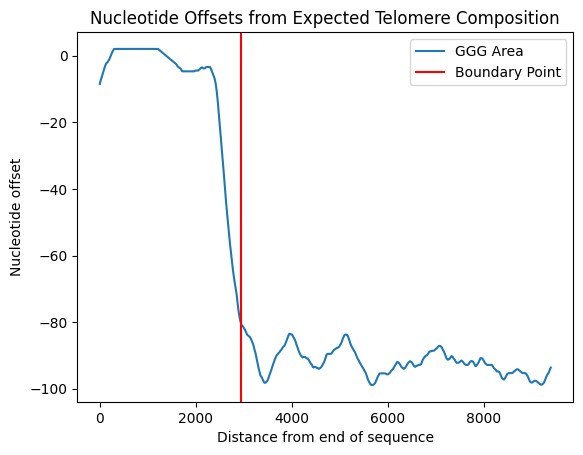

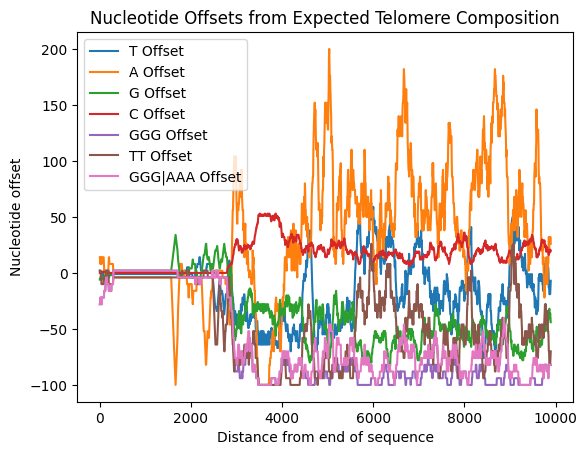

q end: 2952
offset: -22
chrXq


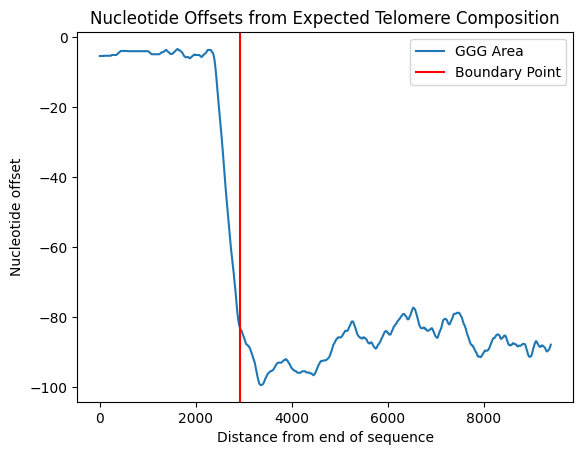

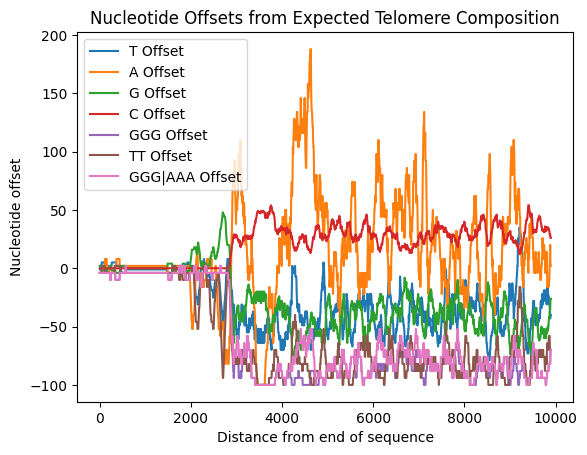

q end: 2928
offset: -15
chrYq


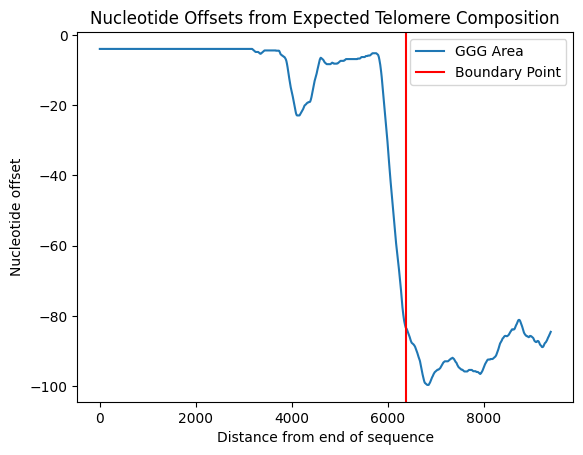

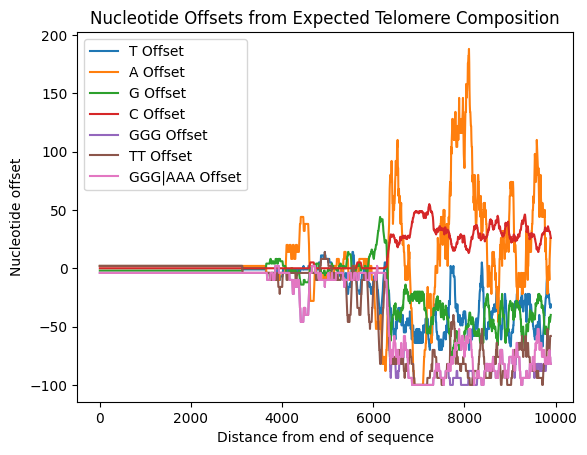

q end: 6372
offset: -16
chr01p


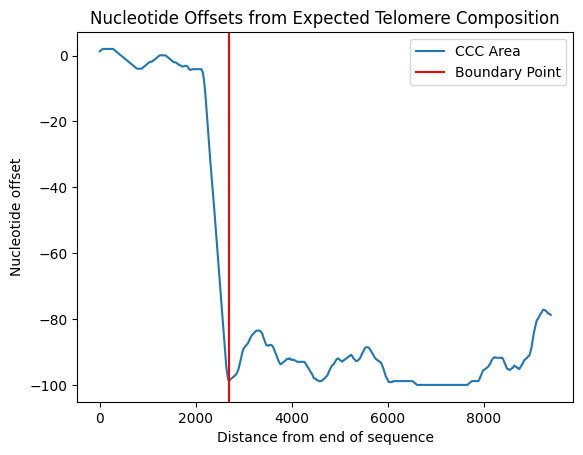

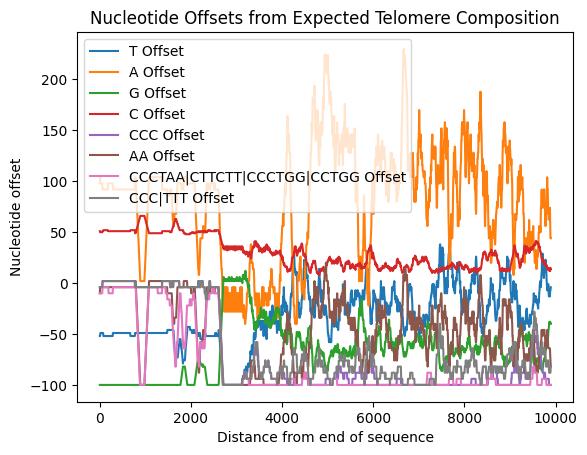

p end: 2682
offset: -22
chr02p


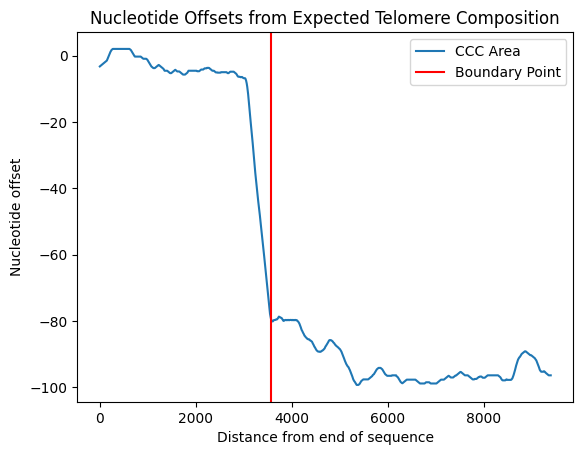

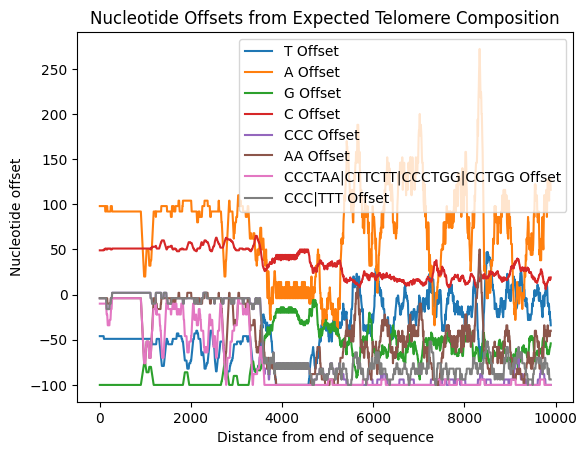

p end: 3576
offset: -41
chr03p


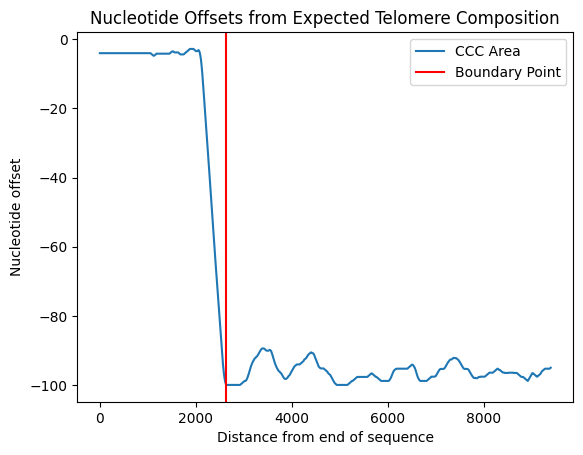

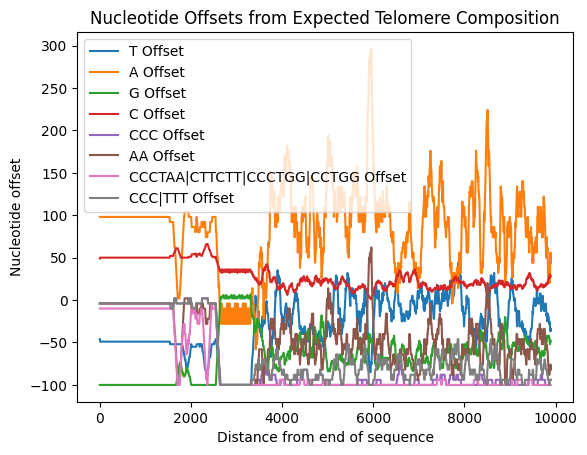

p end: 2628
offset: -12
chr04p


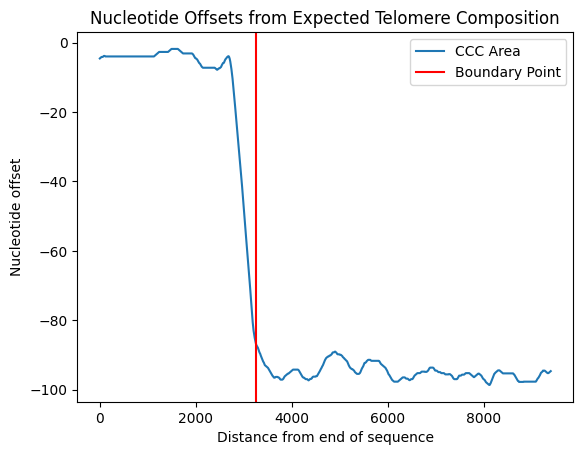

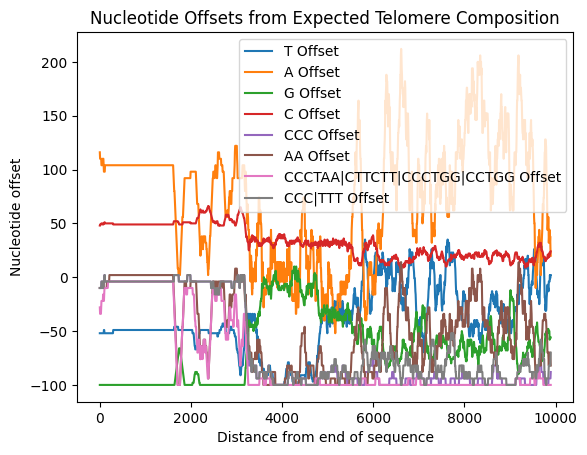

p end: 3264
offset: -3
chr05p


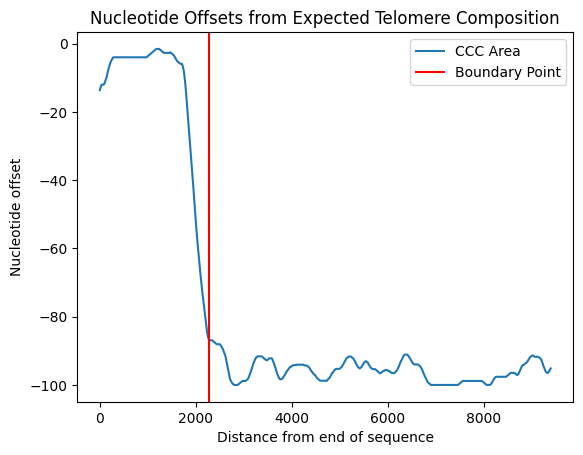

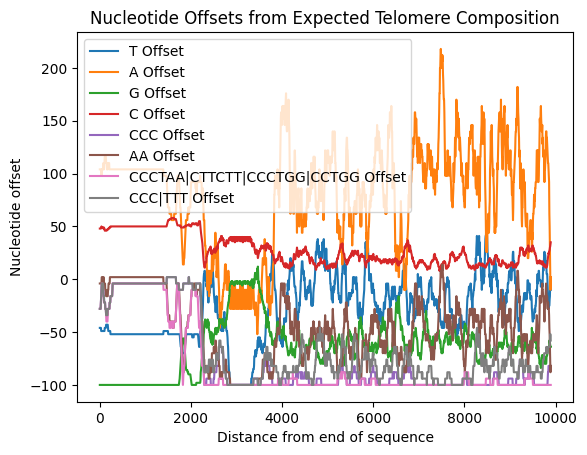

p end: 2274
offset: -21
chr06p


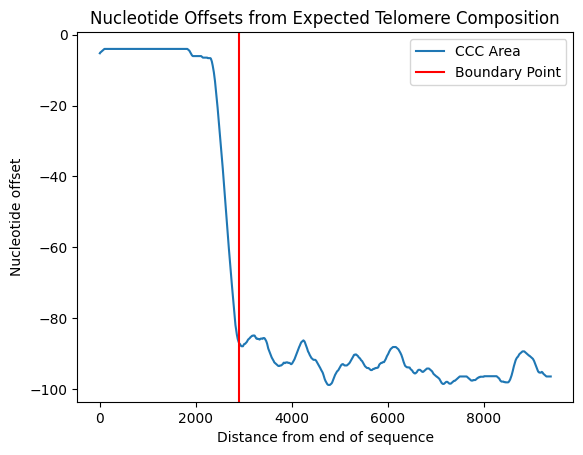

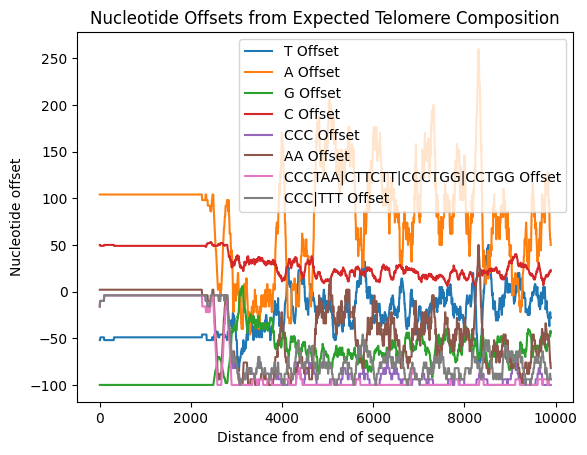

p end: 2898
offset: 2
chr07p


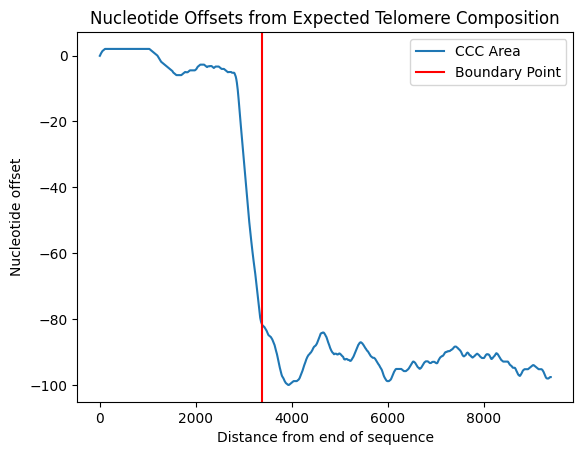

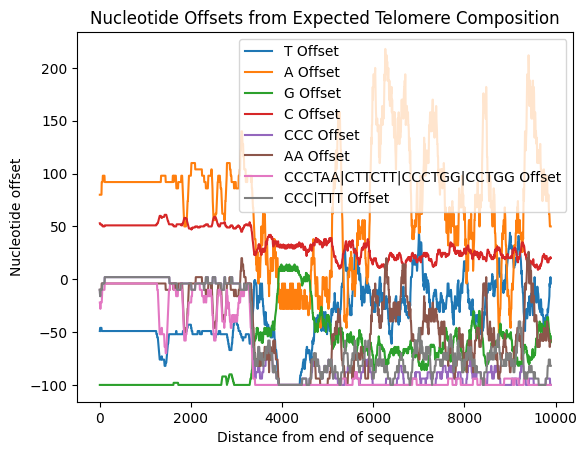

p end: 3384
offset: 10
chr08p


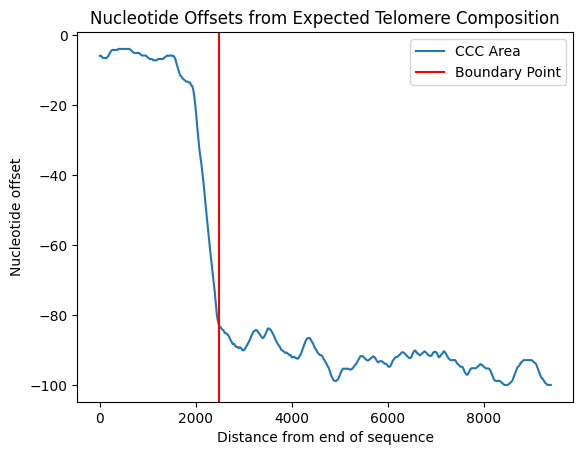

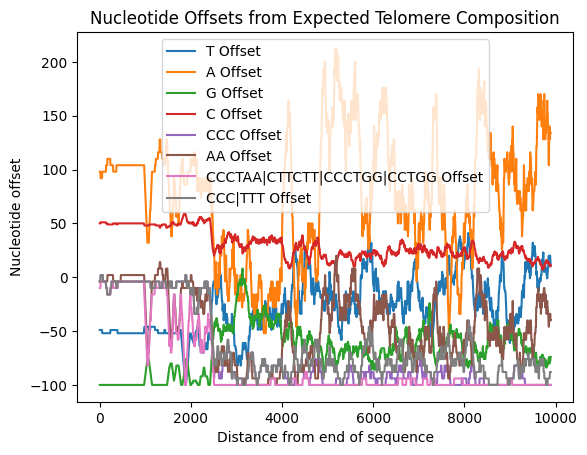

p end: 2490
offset: -27
chr09p


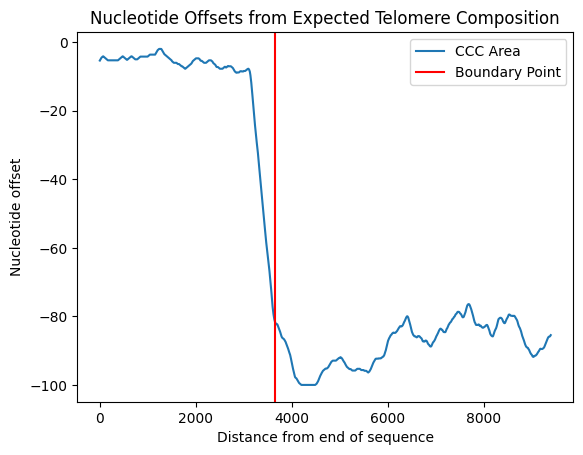

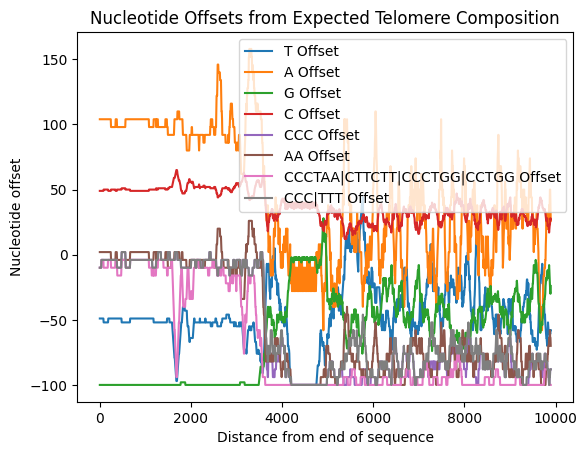

p end: 3660
offset: 74
chr10p


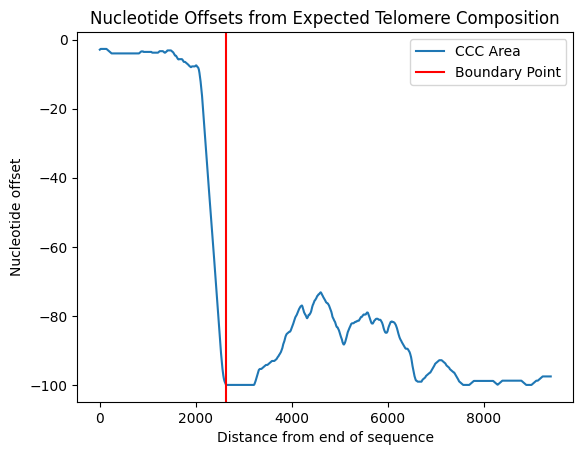

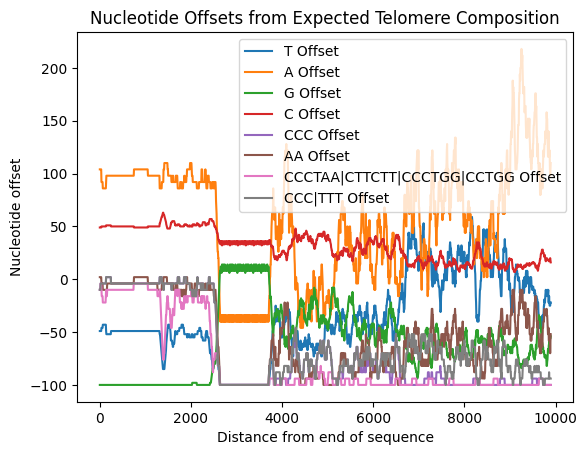

p end: 2622
offset: -15
chr11p


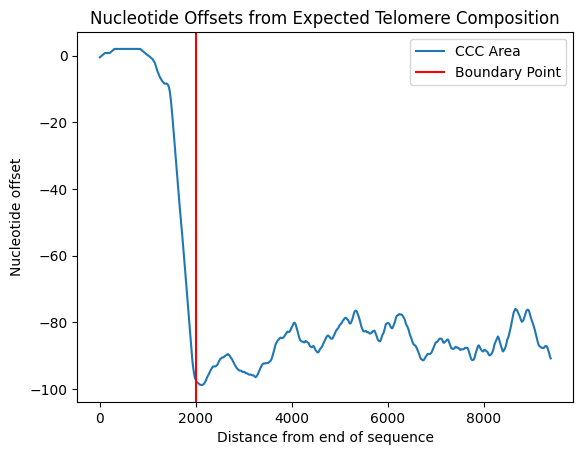

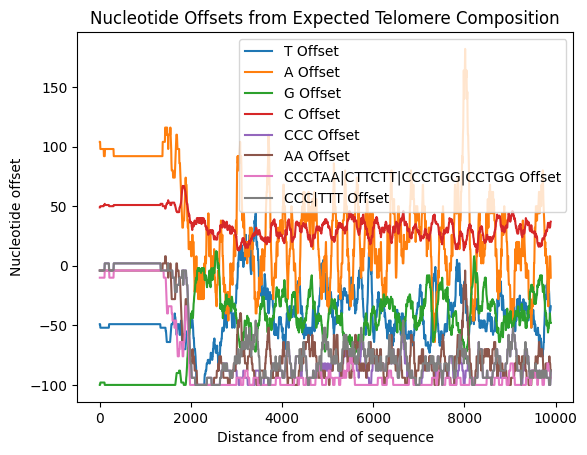

p end: 2010
offset: 23
chr12p


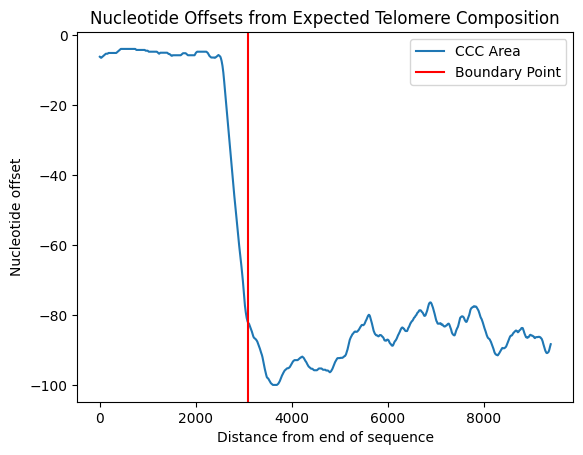

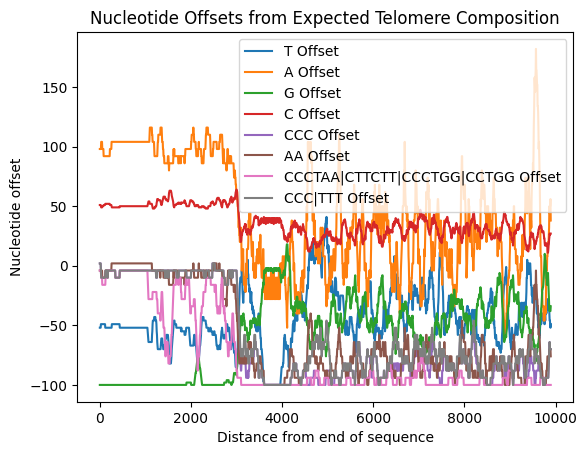

p end: 3084
offset: -17
chr13p


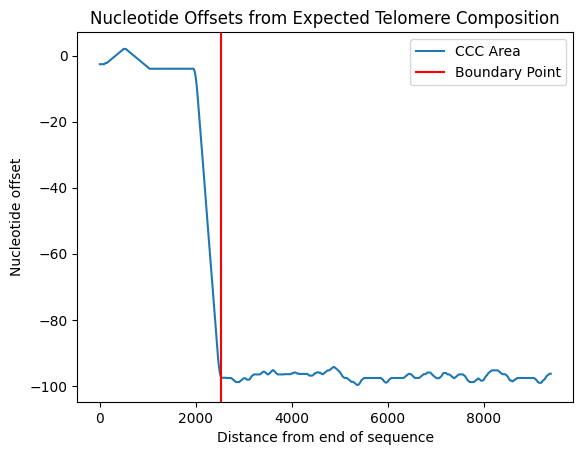

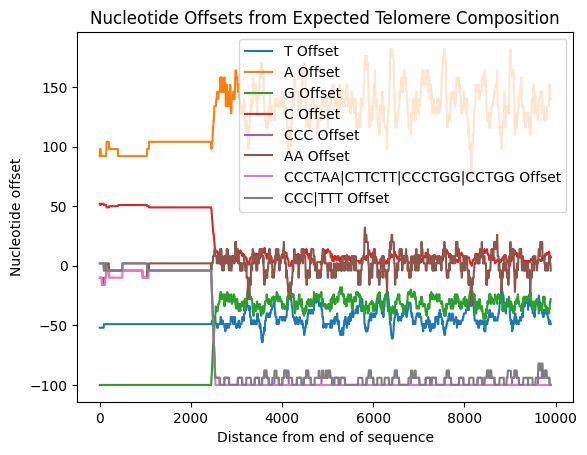

p end: 2526
offset: -17
chr14p


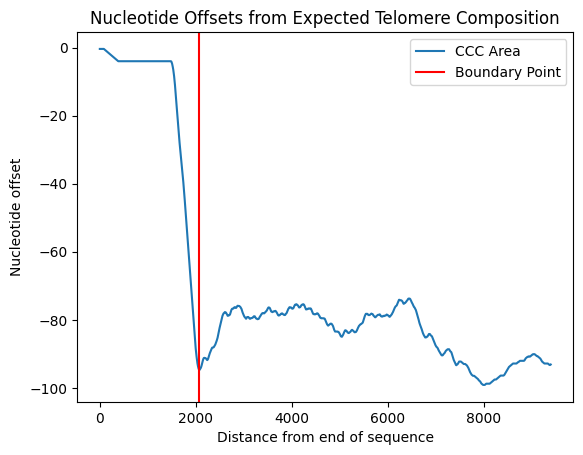

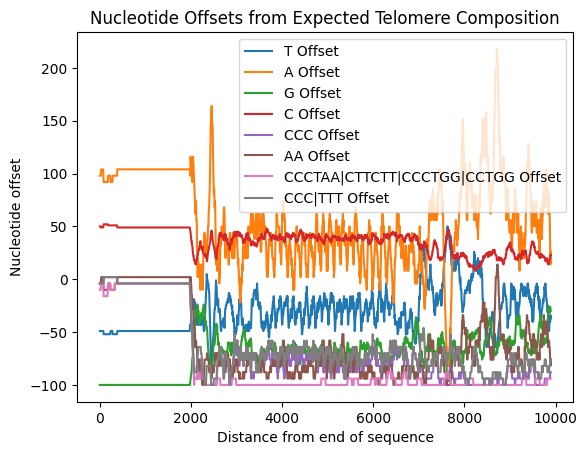

p end: 2064
offset: -10
chr15p


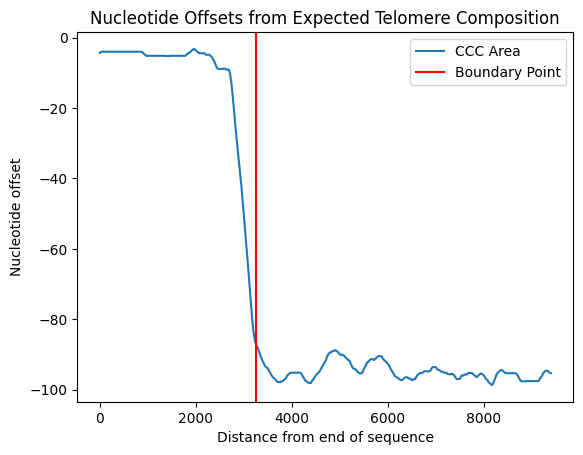

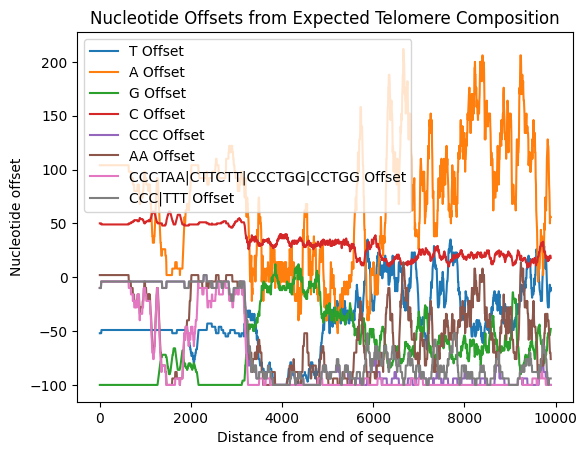

p end: 3258
offset: -6
chr16p


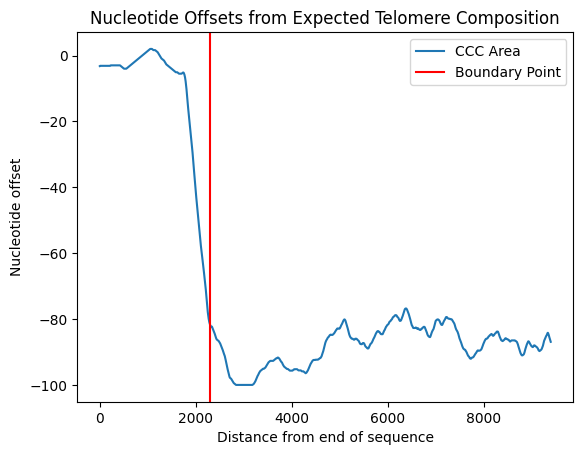

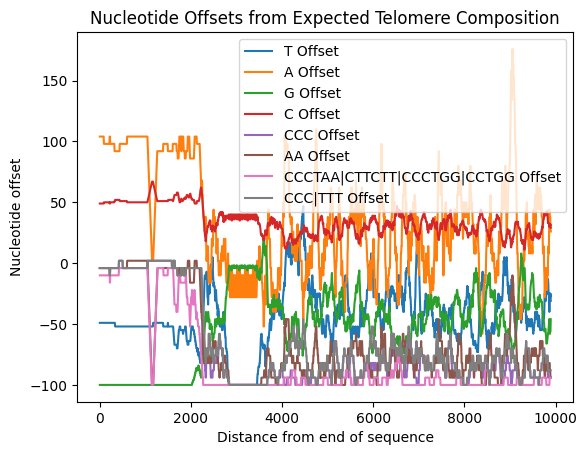

p end: 2304
offset: -19
chr17p


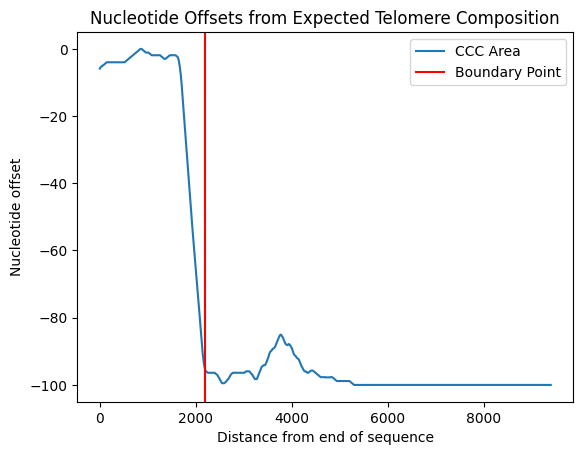

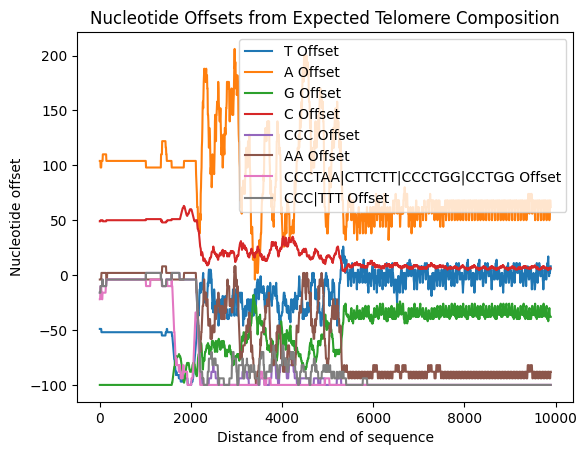

p end: 2202
offset: -7
chr18p


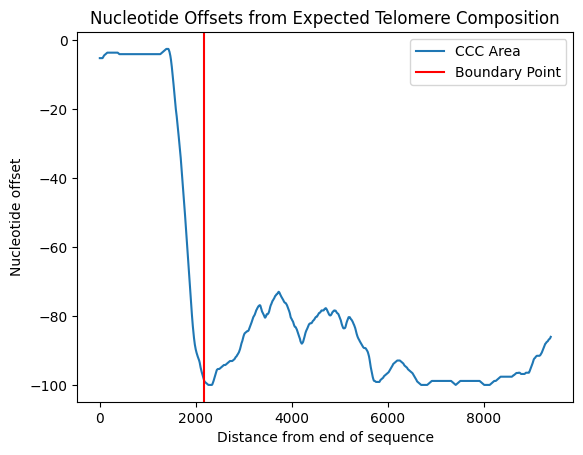

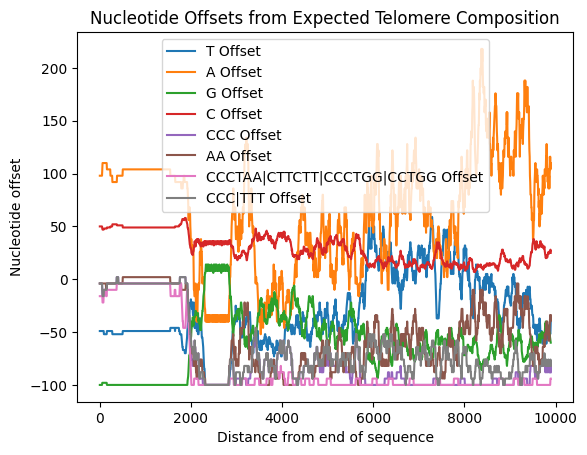

p end: 2178
offset: 163
chr19p


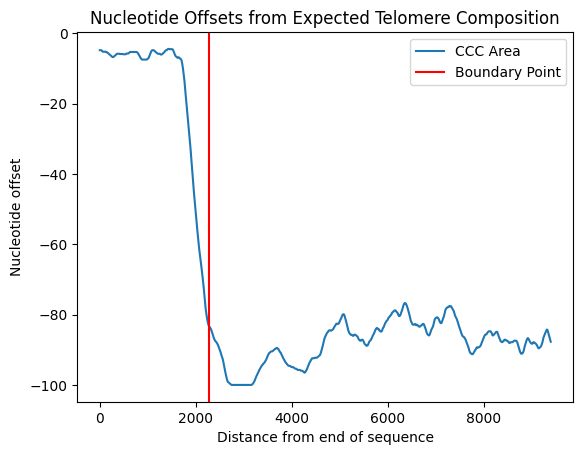

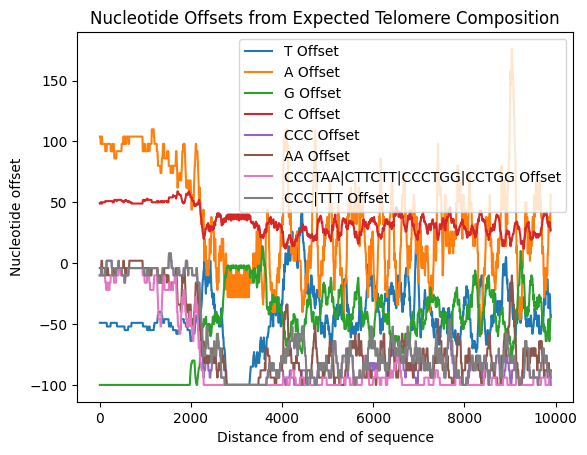

p end: 2268
offset: -16
chr20p


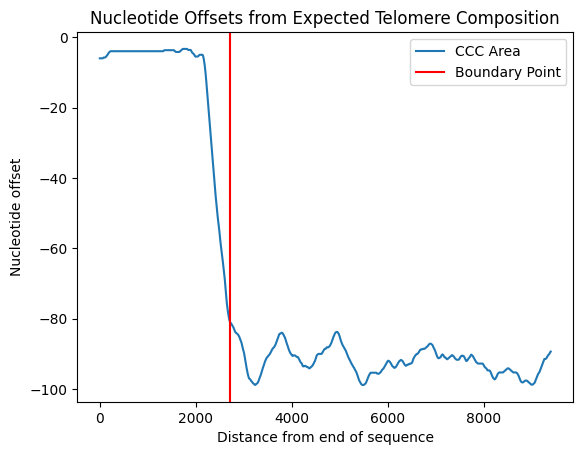

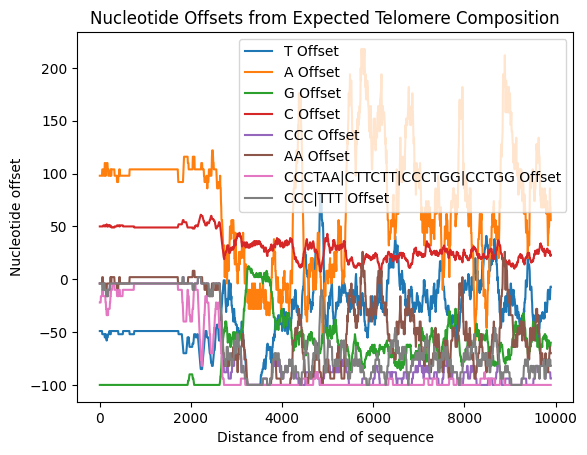

p end: 2712
offset: -15
chr21p


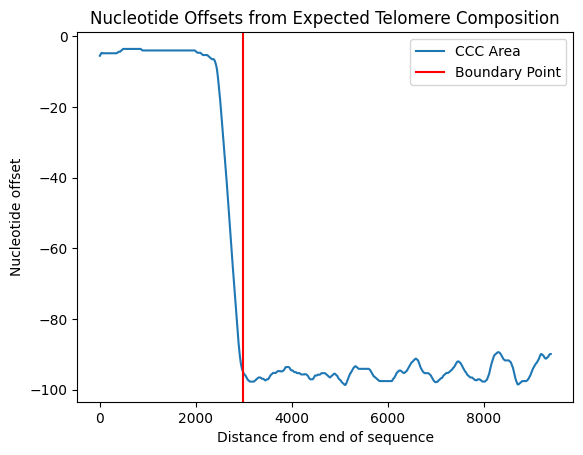

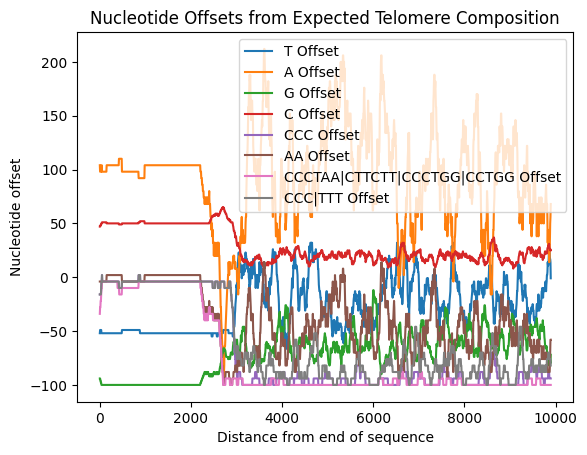

p end: 2982
offset: -30
chr22p


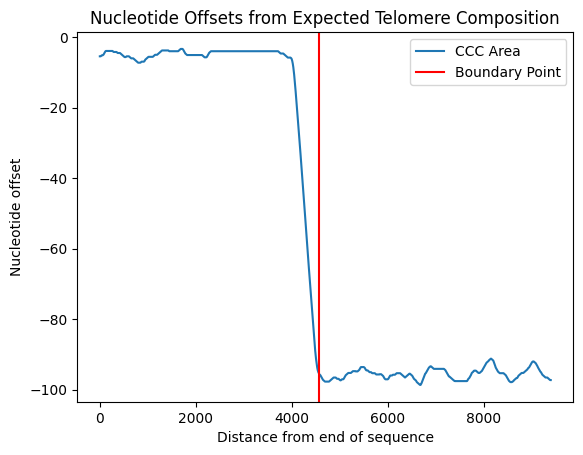

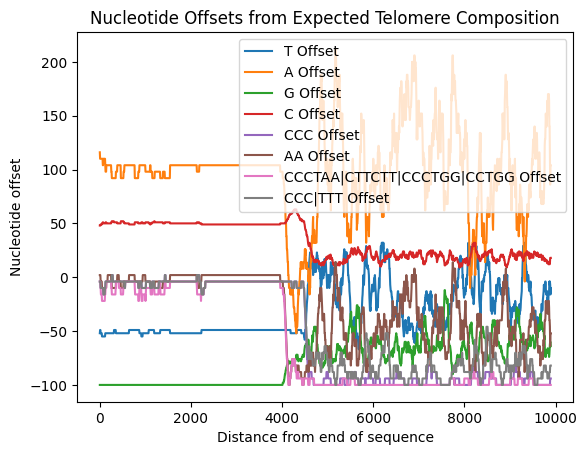

p end: 4560
offset: -17
chrXp


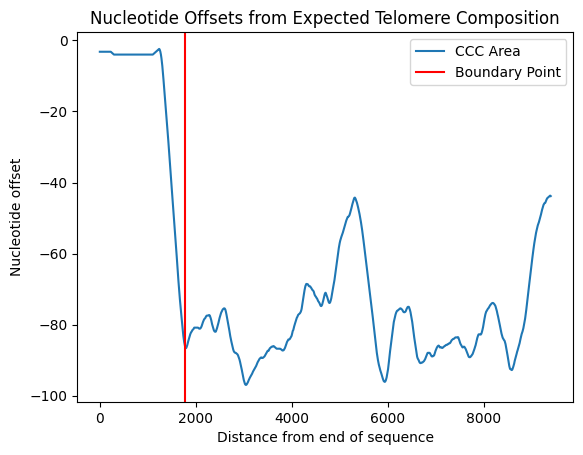

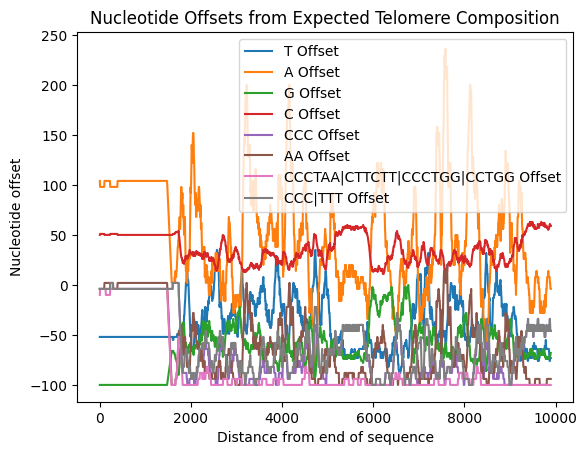

p end: 1782
offset: -44
chrYp


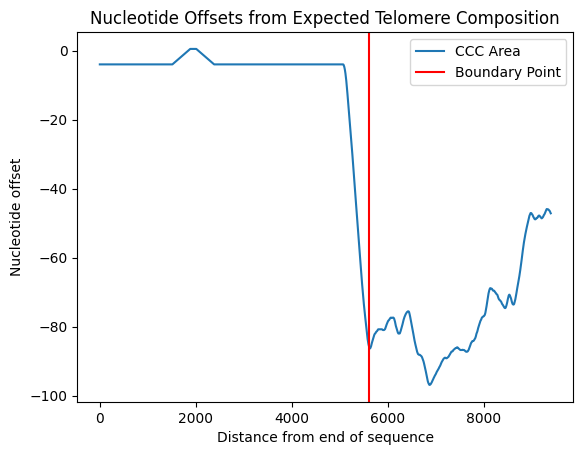

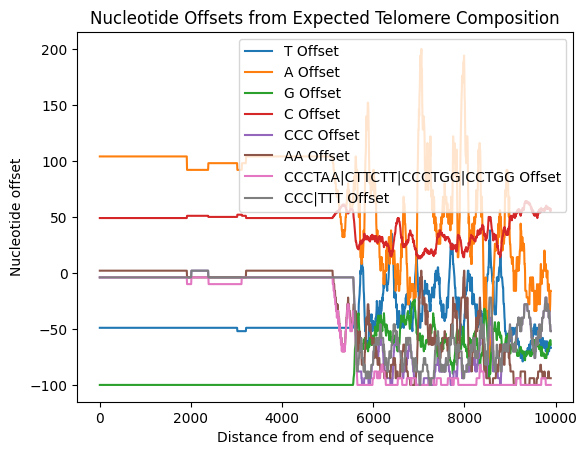

p end: 5616
offset: -42


In [3]:


bed_data = []
offsetScores = []

showGraphs = True

filename = "Data/GCA_009914755.4_T2T-CHM13v2.0_genomic.500kb.ends.fna"
for record in SeqIO.parse(filename, "fasta"):
    chrName = record.id
    print(chrName)

    # if chrName != "chr18q":
    #     continue
    if "p" in chrName:
        distanceFromStart = getTeloBoundary(record.seq[:10000], targetPatternIndex=4, isGStrand=False, teloWindow=100,nucleotideGraphAreaWindowSize=500, windowStep=6,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=showGraphs)
        print("p end: " + str(distanceFromStart))
        pEndIndex = distanceFromStart
        bed_data.append([chrName, pEndIndex-6, pEndIndex, chrName])
        offset = testTeloLength(chrName, distanceFromStart, c.manualLabelsCHM13)
        print("offset: "+str(offset))
        offsetScores.append([chrName, offset])
    else:
        distanceFromEnd = getTeloBoundary(record.seq[-10000:], targetPatternIndex=4, isGStrand = True, teloWindow=100,nucleotideGraphAreaWindowSize=500, windowStep=6,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=showGraphs)
        print("q end: " + str(distanceFromEnd))
        qEndIndex = len(record.seq)-distanceFromEnd
        bed_data.append([chrName, qEndIndex, qEndIndex+6, chrName])
        offset = testTeloLength(chrName, distanceFromEnd, c.manualLabelsCHM13)
        print("offset: "+str(offset))
        offsetScores.append([chrName, offset])
        
    # break
# write_bed_file("./teloBoundaryOutput/TeloBP%2.0Values.bed", bed_data)

In [3]:


bed_data = []
offsetScores = []

filename = "Data/GCA_009914755.4_T2T-CHM13v2.0_genomic.500kb.ends.fna"
for record in SeqIO.parse(filename, "fasta"):
    chrName = record.id
    print(chrName)

    # if chrName != "chr18q":
    #     continue
    if "p" in chrName:
        distanceFromStart = getTeloBoundary(record.seq[:], isGStrand=False, teloWindow=120,nucleotideGraphAreaWindowSize=120, windowStep=6,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=False)
        print("p end: " + str(distanceFromStart))
        pEndIndex = distanceFromStart
        bed_data.append([chrName, pEndIndex-6, pEndIndex, chrName])
        offset = testTeloLength(chrName, distanceFromStart, c.manualLabelsCHM13)
        offsetScores.append([chrName, offset])
    else:
        distanceFromEnd = getTeloBoundary(record.seq[:],isGStrand = True, teloWindow=120,nucleotideGraphAreaWindowSize=120, windowStep=6,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=False)
        print("q end: " + str(distanceFromEnd))
        qEndIndex = len(record.seq)-distanceFromEnd
        bed_data.append([chrName, qEndIndex, qEndIndex+6, chrName])
        offset = testTeloLength(chrName, distanceFromEnd, c.manualLabelsCHM13)
        offsetScores.append([chrName, offset])
        
    # break
# write_bed_file("./teloBoundaryOutput/TeloBP%2.0Values.bed", bed_data)

chr01q
q end: 3204
chr01q offset: -6bp (obs - exp)
chr02q
q end: 2718
chr02q offset: 96bp (obs - exp)
chr03q
q end: 4722
chr03q offset: 107bp (obs - exp)
chr04q
q end: 2310
chr04q offset: -11bp (obs - exp)
chr05q
q end: 1518
chr05q offset: -12bp (obs - exp)
chr06q
q end: 2754
chr06q offset: -24bp (obs - exp)
chr07q
q end: 2178
chr07q offset: -44bp (obs - exp)
chr08q
q end: 2616
chr08q offset: -5bp (obs - exp)
chr09q
q end: 2970
chr09q offset: -7bp (obs - exp)
chr10q
q end: 3162
chr10q offset: -41bp (obs - exp)
chr11q
q end: 2766
chr11q offset: 177bp (obs - exp)
chr12q
q end: 2304
chr12q offset: -35bp (obs - exp)
chr13q
q end: 3498
chr13q offset: -8bp (obs - exp)
chr14q
q end: 1650
chr14q offset: -2bp (obs - exp)
chr15q
q end: 2892
chr15q offset: -37bp (obs - exp)
chr16q
q end: 2676
chr16q offset: -7bp (obs - exp)
chr17q
q end: 3012
chr17q offset: -9bp (obs - exp)
chr18q
q end: 3576
chr18q offset: 87bp (obs - exp)
chr19q
q end: 3030
chr19q offset: 90bp (obs - exp)
chr20q
q end: 3132
chr

In [5]:


bed_data = []
offsetScores = []

filename = "Data/GCA_009914755.4_T2T-CHM13v2.0_genomic.500kb.ends.fna"
for record in SeqIO.parse(filename, "fasta"):
    chrName = record.id
    print(chrName)

    # if chrName != "chr18q":
    #     continue
    if "p" in chrName:
        distanceFromStart = getTeloBoundary(record.seq[:], isGStrand=False, teloWindow=120,nucleotideGraphAreaWindowSize=120, windowStep=6,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=False)
        print("p end: " + str(distanceFromStart))
        pEndIndex = distanceFromStart
        bed_data.append([chrName, pEndIndex-6, pEndIndex, chrName])
        offset = testTeloLength(chrName, distanceFromStart, c.manualLabelsCHM13)
        offsetScores.append([chrName, offset])
    else:
        distanceFromEnd = getTeloBoundary(record.seq[:],isGStrand = True, teloWindow=120,nucleotideGraphAreaWindowSize=120, windowStep=6,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=False)
        print("q end: " + str(distanceFromEnd))
        qEndIndex = len(record.seq)-distanceFromEnd
        bed_data.append([chrName, qEndIndex, qEndIndex+6, chrName])
        offset = testTeloLength(chrName, distanceFromEnd, c.manualLabelsCHM13)
        offsetScores.append([chrName, offset])
        
    # break
# write_bed_file("./teloBoundaryOutput/TeloBP%2.0Values.bed", bed_data)

chr01q
q end: 372660
chr01q offset: 369450bp (obs - exp)
chr02q
q end: 306870
chr02q offset: 304248bp (obs - exp)
chr03q
q end: 458322
chr03q offset: 453707bp (obs - exp)
chr04q
q end: 494844
chr04q offset: 492523bp (obs - exp)
chr05q
q end: 387504
chr05q offset: 385974bp (obs - exp)
chr06q
q end: 218106
chr06q offset: 215328bp (obs - exp)
chr07q
q end: 52110
chr07q offset: 49888bp (obs - exp)
chr08q
q end: 386724
chr08q offset: 384103bp (obs - exp)
chr09q
q end: 117714
chr09q offset: 114737bp (obs - exp)
chr10q
q end: 444996
chr10q offset: 441793bp (obs - exp)
chr11q
q end: 2766
chr11q offset: 177bp (obs - exp)
chr12q
q end: 319656
chr12q offset: 317317bp (obs - exp)
chr13q
q end: 410526
chr13q offset: 407020bp (obs - exp)
chr14q
q end: 1650
chr14q offset: -2bp (obs - exp)
chr15q
q end: 206382
chr15q offset: 203453bp (obs - exp)
chr16q
q end: 295308
chr16q offset: 292625bp (obs - exp)
chr17q
q end: 136104
chr17q offset: 133083bp (obs - exp)
chr18q
q end: 381240
chr18q offset: 377751bp